# Storytelling Data Visualization on Cesta Básica vs. Salário Mínimo

In [1]:
'''
Autor: João Marcos Viana
Data: Maio 2022
Este projeto tem o objetivo de analisar dois conjuntos
de dados que apresentam os valores mês a mês da cesta básica
de alimentos e também do salário mínimo no Brasil, afim de
criar uma relação entre essas duas variáveis.
Dessa forma, foram gerados alguns gráficos que apresentam
a relação de quantos por cento do salário
mínimo é comprometido somente com o valor da cesta básica.
'''
# imports
import logging
from datetime import datetime
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt

# configurando o logging
logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

## Introdução e Limpeza dos Datasets

In [2]:
def read_data(file_path):
    """Read data from csv.

    Args:
        file_path (str): file path to read.

    Return:
        df_file (DataFrame): returns the file read as a dataframe.
    """
    try:
        df_file = pd.read_csv(file_path)
        logging.info("SUCCESS : File %s is read without erros", file_path)
        return df_file
    except FileNotFoundError:
        logging.error("ERROR : There's no such %s", file_path)
        return None

In [3]:
def apply_datetime(df_file, date_column, original_format):
    """Transform the column that contains date
    to datetime format.

    Args:
        df_file (DataFrame): df that will be transformed.
        date_column (str): column name that contains date.
        original_format (str): date format in original dataset
                               this has to be informed to conversion

    Return:
        df_after (DataFrame): returns the new dataframe with the data
                             labels in correctly format.
    """
    try:
        df_after = df_file.copy()
        df_after[date_column] = pd.to_datetime(
            df_after[date_column], format=original_format)

        df_after[date_column] = df_after[date_column].dt.date

        df_after.sort_values(date_column, inplace=True)
        df_after.reset_index(drop=True, inplace=True)
        logging.info("SUCCESS : Datetime conversion is executed without erros")
        return df_after
    except: # pylint: disable=bare-except
        logging.error("ERROR : Datetime conversion not work")
        return None

### Valores salário mínimo

In [9]:
salario_minimo = read_data('/content/salario_minimo.csv')
salario_minimo.head()

,Data,Salário mínimo vigente - R$ - Ministério da Economia- Outras (Min- Economia/Outras) - MTE12_SALMIN12,Unnamed: 2
0,2003-01,200,NaN
1,2003-02,200,NaN
2,2003-03,200,NaN
3,2003-04,240,NaN
4,2003-05,240,NaN


In [10]:
salario_minimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Data                                                                                                  232 non-null    object 
 1   Salário mínimo vigente - R$ - Ministério da Economia- Outras (Min- Economia/Outras) - MTE12_SALMIN12  232 non-null    int64  
 2   Unnamed: 2                                                                                            0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [11]:
salario_minimo.rename(columns={
    'Salário mínimo vigente - R$ -' +
    ' Ministério da Economia- Outras (Min- Economia/Outras) - MTE12_SALMIN12': 'Salario_minimo',
     }, inplace=True)

salario_minimo = salario_minimo.drop(columns=['Unnamed: 2'])
salario_minimo = apply_datetime(salario_minimo, 'Data', '%Y-%m')

In [12]:
salario_minimo.head()

,Data,Salario_minimo
0,2003-01-01,200
1,2003-02-01,200
2,2003-03-01,200
3,2003-04-01,240
4,2003-05-01,240


### Valores cesta básica

In [13]:
cesta_basica = read_data('cesta_basica.csv')
cesta_basica.head()

,Gasto Mensal - Total da Cesta,Brasília,Campo Grande,Cuiabá,Goiânia,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória,Curitiba,...,Aracaju,Fortaleza,João Pessoa,Maceió,Natal,Recife,Salvador,São Luís,Teresina,Macaé
0,01-2003,155.98,NaN,NaN,141.61,150.53,150.74,162.79,137.93,154.13,...,140.63,132.40,125.97,NaN,129.28,126.62,132.43,NaN,NaN,NaN
1,02-2003,160.69,NaN,NaN,143.78,153.62,156.10,166.54,143.98,158.24,...,145.21,136.16,131.74,NaN,137.66,135.99,134.40,NaN,NaN,NaN
2,03-2003,167.49,NaN,NaN,153.60,163.76,166.76,174.59,149.28,166.89,...,148.41,142.43,133.55,NaN,139.84,136.71,140.27,NaN,NaN,NaN
3,04-2003,170.14,NaN,NaN,151.08,167.94,173.20,185.40,155.75,170.33,...,156.59,149.66,143.43,NaN,150.57,147.50,147.14,NaN,NaN,NaN
4,05-2003,164.13,NaN,NaN,148.23,161.02,166.52,175.95,149.85,163.53,...,157.83,142.65,138.35,NaN,145.90,142.36,142.66,NaN,NaN,NaN


In [14]:
cesta_basica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gasto Mensal - Total da Cesta  232 non-null    object 
 1   Brasília                       231 non-null    float64
 2   Campo Grande                   115 non-null    float64
 3   Cuiabá                         32 non-null     float64
 4   Goiânia                        232 non-null    float64
 5   Belo Horizonte                 231 non-null    float64
 6   Rio de Janeiro                 232 non-null    float64
 7   São Paulo                      232 non-null    float64
 8   Vitória                        232 non-null    float64
 9   Curitiba                       232 non-null    float64
 10  Florianópolis                  232 non-null    float64
 11  Porto Alegre                   232 non-null    float64
 12  Belém                          232 non-null    flo

In [15]:
cesta_basica.rename(columns={'Gasto Mensal - Total da Cesta': 'Data',
                             },
                    inplace=True)
cesta_basica = cesta_basica.drop(columns=['Brasília', 'Campo Grande',	'Cuiabá',
                                          'Belo Horizonte', 'Boa Vista', 'Macapá',
                                          'Manaus',	'Palmas', 'Porto Velho', 'Rio Branco',
                                          'Maceió', 'São Luís',	'Teresina',	'Macaé'])
cesta_basica['Media_Brasil'] = (
    cesta_basica.iloc[0:, 1:].mean(axis=1)).round(2)
cesta_basica = apply_datetime(cesta_basica, 'Data', '%m-%Y')

In [16]:
cesta_basica.head()

,Data,Goiânia,Rio de Janeiro,São Paulo,Vitória,Curitiba,Florianópolis,Porto Alegre,Belém,Aracaju,Fortaleza,João Pessoa,Natal,Recife,Salvador,Media_Brasil
0,2003-01-01,141.61,150.74,162.79,137.93,154.13,150.64,164.97,139.39,140.63,132.40,125.97,129.28,126.62,132.43,142.11
1,2003-02-01,143.78,156.10,166.54,143.98,158.24,155.50,165.55,141.94,145.21,136.16,131.74,137.66,135.99,134.40,146.63
2,2003-03-01,153.60,166.76,174.59,149.28,166.89,163.10,172.85,151.22,148.41,142.43,133.55,139.84,136.71,140.27,152.82
3,2003-04-01,151.08,173.20,185.40,155.75,170.33,164.49,184.64,162.28,156.59,149.66,143.43,150.57,147.50,147.14,160.15
4,2003-05-01,148.23,166.52,175.95,149.85,163.53,162.41,174.24,158.50,157.83,142.65,138.35,145.90,142.36,142.66,154.93


### Dataset Final

In [17]:
salario_cesta = pd.merge(salario_minimo, cesta_basica, how='outer')
salario_cesta['Data'] = pd.to_datetime(cesta_basica['Data'])
salario_cesta['Salario_Cesta'] = salario_cesta['Media_Brasil'] / \
    salario_cesta['Salario_minimo']

In [18]:
salario_cesta.head()

,Data,Salario_minimo,Goiânia,Rio de Janeiro,São Paulo,Vitória,Curitiba,Florianópolis,Porto Alegre,Belém,Aracaju,Fortaleza,João Pessoa,Natal,Recife,Salvador,Media_Brasil,Salario_Cesta
0,2003-01-01,200,141.61,150.74,162.79,137.93,154.13,150.64,164.97,139.39,140.63,132.40,125.97,129.28,126.62,132.43,142.11,0.710550
1,2003-02-01,200,143.78,156.10,166.54,143.98,158.24,155.50,165.55,141.94,145.21,136.16,131.74,137.66,135.99,134.40,146.63,0.733150
2,2003-03-01,200,153.60,166.76,174.59,149.28,166.89,163.10,172.85,151.22,148.41,142.43,133.55,139.84,136.71,140.27,152.82,0.764100
3,2003-04-01,240,151.08,173.20,185.40,155.75,170.33,164.49,184.64,162.28,156.59,149.66,143.43,150.57,147.50,147.14,160.15,0.667292
4,2003-05-01,240,148.23,166.52,175.95,149.85,163.53,162.41,174.24,158.50,157.83,142.65,138.35,145.90,142.36,142.66,154.93,0.645542


## Análise Exploratória

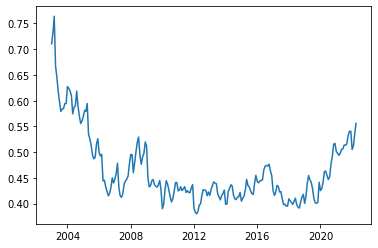

In [19]:
%matplotlib inline

plt.plot(salario_cesta['Data'], salario_cesta['Media_Brasil']/salario_cesta['Salario_minimo'])
plt.show()

## Analise Explanatória

In [20]:
lula = salario_cesta.copy(
)[salario_cesta['Data'].dt.year < 2011]
dilmatemer = salario_cesta.copy(
)[(salario_cesta['Data'].dt.year >= 2011) & (salario_cesta['Data'].dt.year < 2019)]
bolso = salario_cesta.copy(
)[(salario_cesta['Data'].dt.year >= 2019) & (salario_cesta['Data'].dt.year <= 2022)]

dilma = dilmatemer.copy(
)[dilmatemer['Data'] < datetime.strptime('2016-09-01', '%Y-%m-%d')]
temer = dilmatemer.copy(
)[dilmatemer['Data'] >= datetime.strptime('2016-09-01', '%Y-%m-%d')]

In [21]:
lula.tail()

,Data,Salario_minimo,Goiânia,Rio de Janeiro,São Paulo,Vitória,Curitiba,Florianópolis,Porto Alegre,Belém,Aracaju,Fortaleza,João Pessoa,Natal,Recife,Salvador,Media_Brasil,Salario_Cesta
91,2010-08-01,510,213.97,211.88,235.65,217.96,214.57,221.24,240.91,207.97,174.96,179.50,183.31,195.58,188.22,192.69,205.60,0.403137
92,2010-09-01,510,217.66,219.54,241.08,225.35,219.28,223.73,243.73,211.31,173.56,185.12,181.23,193.08,192.20,199.77,209.05,0.409902
93,2010-10-01,510,229.93,230.13,253.79,231.26,231.96,230.85,247.21,219.57,172.40,193.38,186.34,200.97,195.64,205.18,216.33,0.424176
94,2010-11-01,510,236.31,242.35,264.61,246.75,239.06,238.98,249.78,224.00,179.78,208.91,193.49,205.84,206.32,210.64,224.77,0.440725
95,2010-12-01,510,234.61,242.67,265.15,242.00,243.97,238.14,252.15,226.09,175.88,205.65,194.24,219.80,205.50,201.70,224.82,0.440824


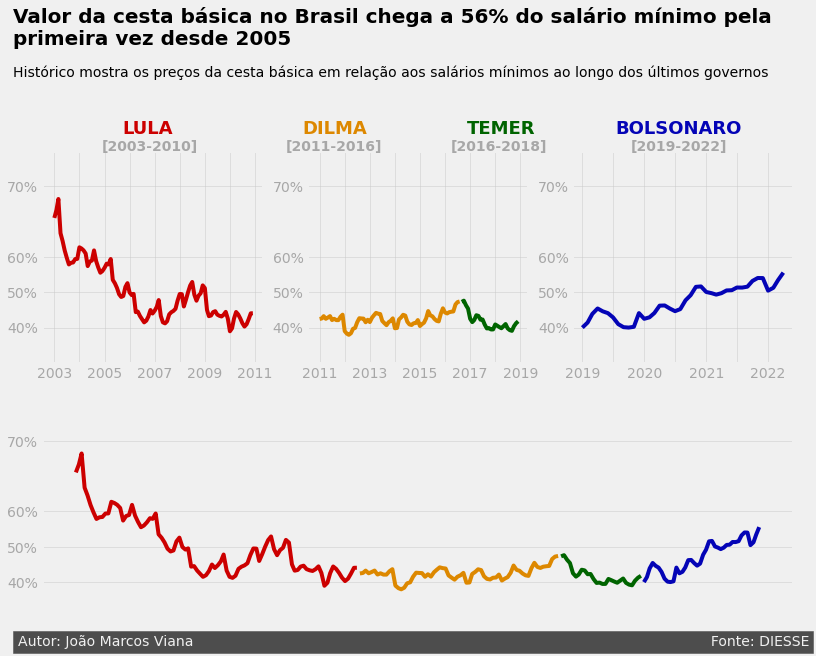

In [23]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the subplots
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

# Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.3, 0.9)
    ax.set_yticks([0.4, 0.5, 0.6, 0.8])
    ax.set_yticklabels(['40%', '50%', '60%', '70%'],
                       alpha=0.3)
    ax.grid(alpha=0.5)


### Ax1: Lula
ax1.plot(lula['Data'], lula['Salario_Cesta'],
         color='#CC0000')
ax1.set_xticks([datetime.strptime('2002-07-01', '%Y-%m-%d'),
                datetime.strptime('2003-01-01', '%Y-%m-%d'),
                datetime.strptime('2004-01-01', '%Y-%m-%d'),
                datetime.strptime('2005-01-01', '%Y-%m-%d'),
                datetime.strptime('2006-01-01', '%Y-%m-%d'),
                datetime.strptime('2007-01-01', '%Y-%m-%d'),
                datetime.strptime('2008-01-01', '%Y-%m-%d'),
                datetime.strptime('2009-01-01', '%Y-%m-%d'),
                datetime.strptime('2010-01-01', '%Y-%m-%d'),
                datetime.strptime('2011-01-01', '%Y-%m-%d'), ])
ax1.set_xticklabels(['', '2003', '', '2005', '', '2007', '',
                     '2009', '', '2011'],
                    alpha=0.3)
ax1.text(732200.0, 0.95, 'LULA', fontsize=18, weight='bold',
         color='#CC0000')
ax1.text(731900.0, 0.9, '[2003-2010]', weight='bold',
         alpha=0.3)

### Ax2: Dilma/Temer
ax2.plot(dilma['Data'], dilma['Salario_Cesta'],
         color='#dd8800')
ax2.plot(temer['Data'], temer['Salario_Cesta'],
         color='#006400')
ax2.set_xticks([datetime.strptime('2010-07-01', '%Y-%m-%d'),
                datetime.strptime('2011-01-01', '%Y-%m-%d'),
                datetime.strptime('2012-01-01', '%Y-%m-%d'),
                datetime.strptime('2013-01-01', '%Y-%m-%d'),
                datetime.strptime('2014-01-01', '%Y-%m-%d'),
                datetime.strptime('2015-01-01', '%Y-%m-%d'),
                datetime.strptime('2016-01-01', '%Y-%m-%d'),
                datetime.strptime('2017-01-01', '%Y-%m-%d'),
                datetime.strptime('2018-01-01', '%Y-%m-%d'),
                datetime.strptime('2019-01-01', '%Y-%m-%d'), ])
ax2.set_xticklabels(['', '2011', '', '2013', '', '2015', '',
                     '2017', '', '2019'],
                    alpha=0.3)
ax2.text(733888.0, 0.95, 'DILMA', fontsize=18, weight='bold',
         color='#dd8800')
ax2.text(736288.0, 0.95, 'TEMER', fontsize=18, weight='bold',
         color='#006400')
ax2.text(733650.0, 0.9, '[2011-2016]', weight='bold',
         alpha=0.3)
ax2.text(736050.0, 0.9, '[2016-2018]', weight='bold',
         alpha=0.3)


### Ax3: Bolsonaro
ax3.plot(bolso['Data'], bolso['Salario_Cesta'],
         color='#0404b6')
ax3.set_xticks([datetime.strptime('2019-01-01', '%Y-%m-%d'),
                datetime.strptime('2019-07-01', '%Y-%m-%d'),
                datetime.strptime('2020-01-01', '%Y-%m-%d'),
                datetime.strptime('2020-07-01', '%Y-%m-%d'),
                datetime.strptime('2021-01-01', '%Y-%m-%d'),
                datetime.strptime('2021-07-01', '%Y-%m-%d'),
                datetime.strptime('2022-01-01', '%Y-%m-%d')])
ax3.set_xticklabels(['2019', '', '2020', '', '2021', '', '2022'],
                    alpha=0.3)
ax3.text(737255.0, 0.95, 'BOLSONARO', fontsize=18, weight='bold',
         color='#0404b6')
ax3.text(737345.0, 0.9, '[2019-2022]', weight='bold',
         alpha=0.3)

### Ax4: Lula-Dilma-Temer-Bolsonaro
ax4.plot(lula['Data'], lula['Salario_Cesta'],
         color='#CC0000')
ax4.plot(dilma['Data'], dilma['Salario_Cesta'],
         color='#dd8800')
ax4.plot(temer['Data'], temer['Salario_Cesta'],
         color='#006400')
ax4.plot(bolso['Data'], bolso['Salario_Cesta'],
         color='#0404b6')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

# Adding a title and a subtitle
ax1.text(730616.0, 1.20, 'Valor da cesta básica no Brasil chega a 56% ' +
         'do salário mínimo pela \nprimeira vez desde 2005',
         fontsize=20, weight='bold')
ax1.text(730616.0, 1.11, 'Histórico mostra os preços da cesta básica em relação ' +
         'aos salários mínimos ao longo dos últimos governos',
         fontsize=14)

# Adding a signature
ax4.text(730616.0, 0.22, 'Autor: João Marcos Viana' + ' '*115 + 'Fonte: DIESSE',
         color='#f0f0f0', backgroundcolor='#4d4d4d',
         size=14)

#plt.savefig('salario_cesta_governos.png', format='png')
plt.show()